## import dependency

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn import metrics


## Read data

In [8]:
cal = pd.read_csv('C:/Users/DEBASHIS/Desktop/E-2-E Calory count prediction using XGboost/notebooks/data/calories.csv')
exc = pd.read_csv('C:/Users/DEBASHIS/Desktop/E-2-E Calory count prediction using XGboost/notebooks/data/exercise.csv')

In [9]:
cal.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [10]:
exc.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


## Merge data sets

In [15]:
df = cal.merge(exc, on='User_ID')
df.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8


## Checking data

In [22]:
df.shape

(15000, 9)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Calories    15000 non-null  float64
 2   Gender      15000 non-null  object 
 3   Age         15000 non-null  int64  
 4   Height      15000 non-null  float64
 5   Weight      15000 non-null  float64
 6   Duration    15000 non-null  float64
 7   Heart_Rate  15000 non-null  float64
 8   Body_Temp   15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [21]:
df.isnull().sum()

User_ID       0
Calories      0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

# Analysis

In [23]:
df.describe()

,User_ID,Calories,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,89.539533,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,2.872851e+06,62.456978,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000116e+07,1.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,1.247419e+07,35.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,1.499728e+07,79.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,1.744928e+07,138.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,1.999965e+07,314.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


In [27]:
sns.set(style='whitegrid')

<Axes: xlabel='count', ylabel='Gender'>

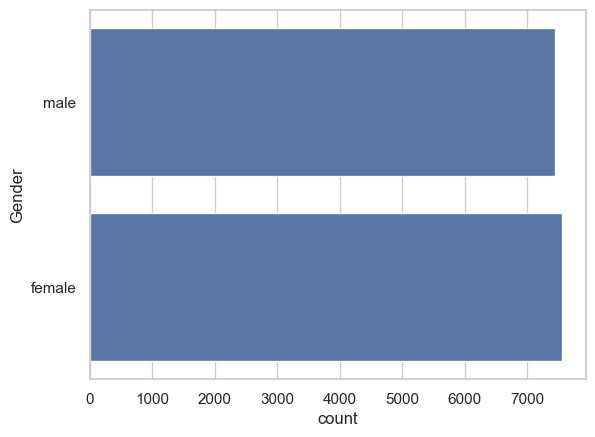

In [28]:
sns.countplot(df['Gender'])

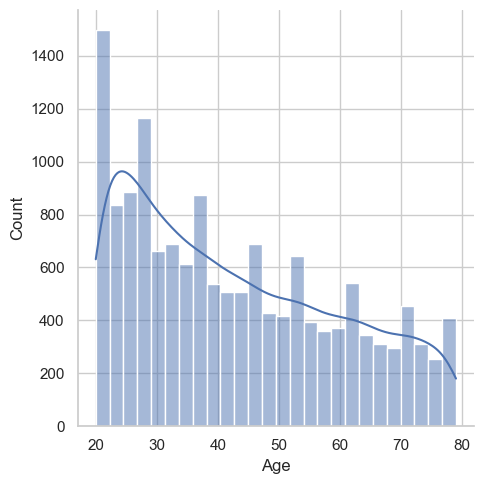

In [31]:
sns.displot(df['Age'], kde=True)

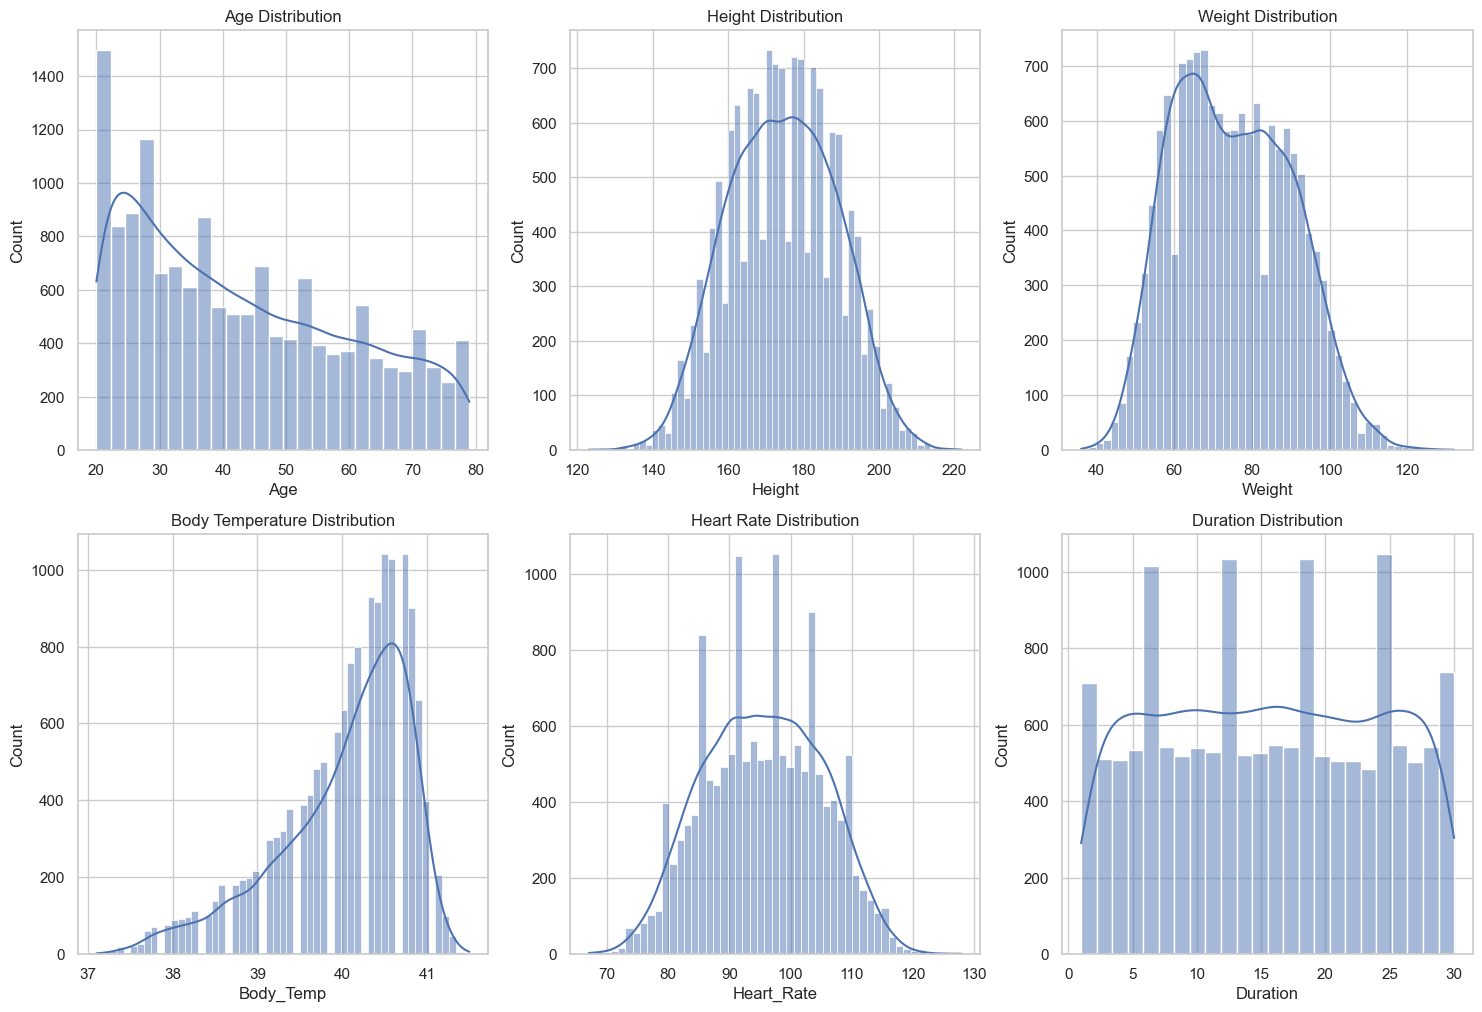

In [44]:
# Create a figure and a grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot the histograms
sns.histplot(df['Age'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

sns.histplot(df['Height'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Height Distribution')

sns.histplot(df['Weight'], kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Weight Distribution')

sns.histplot(df['Body_Temp'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Body Temperature Distribution')

sns.histplot(df['Heart_Rate'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Heart Rate Distribution')

sns.histplot(df['Duration'], kde=True, ax=axes[1, 2])
axes[1, 2].set_title('Duration Distribution')

# Adjust layout
#plt.tight_layout()
plt.show()

In [48]:
corr = df.drop(['User_ID','Gender'], axis=1).corr()

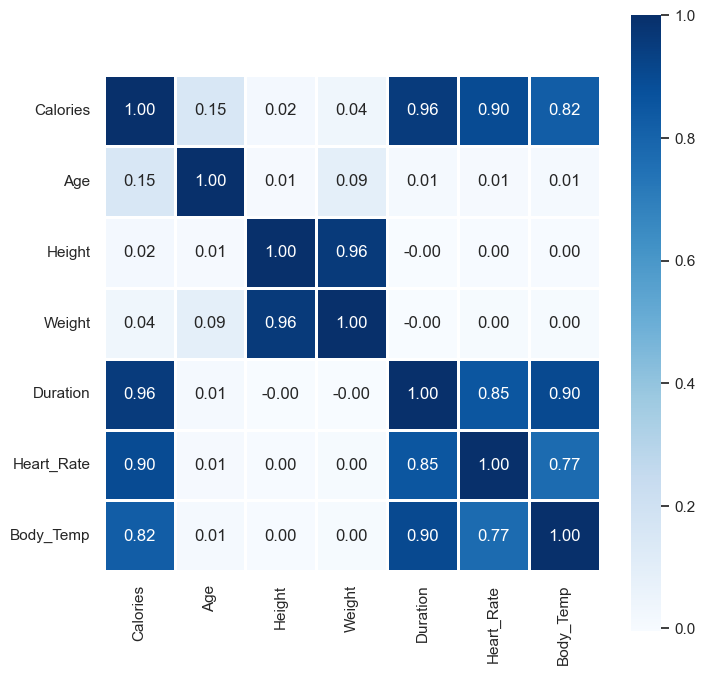

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f", linewidths=2,cbar=True, square=True)
plt.show()

We can see calories burn is highly corelated with duration, heart rate and body temp

c:\Users\DEBASHIS\Desktop\E-2-E Calory count prediction using XGboost\env\lib\site-packages\seaborn\distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(


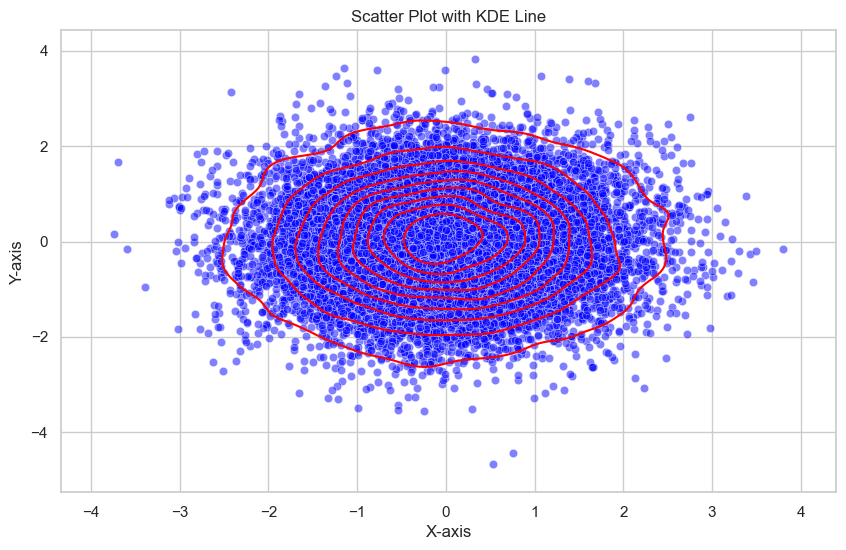

In [67]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.classes_ = ["female","male"]
df['Gender'] = encoder.fit_transform(df['Gender'])

In [69]:
X = df.drop(['User_ID','Calories'], axis=1)
y = df['Calories']

In [70]:
X.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,1,68,190.0,94.0,29.0,105.0,40.8
1,0,20,166.0,60.0,14.0,94.0,40.3
2,1,69,179.0,79.0,5.0,88.0,38.7
3,0,34,179.0,71.0,13.0,100.0,40.5
4,0,27,154.0,58.0,10.0,81.0,39.8


In [71]:
y.head()

0    231.0
1     66.0
2     26.0
3     71.0
4     35.0
Name: Calories, dtype: float64

In [72]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model train

In [75]:
model = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.1, max_depth = 5, n_estimators = 1000)

In [76]:
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
model.score(x_test, y_test)

0.9996597792773314

In [90]:
test_pred = model.predict(x_test)

In [93]:
mse=metrics.mean_squared_error(y_test, test_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 4.568956111227719


In [94]:
mae=metrics.mean_absolute_error(y_test, test_pred)
print('Mean Absolute Error:', mae)

Mean Absolute Error: 1.4981198125282924
